In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [107]:
x,y=make_blobs(n_samples=500,n_features=2,centers=5)

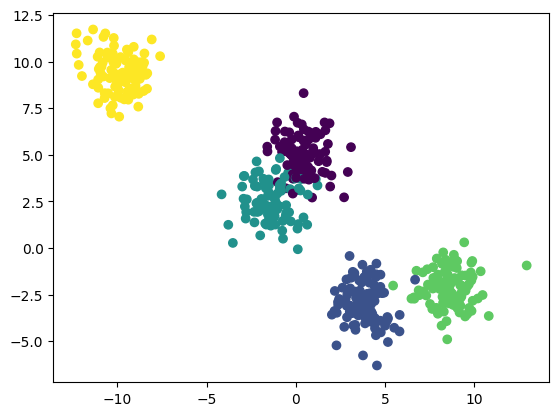

In [108]:
plt.scatter(x[:,0],x[:,1],c=y)

In [109]:
colors=['green','yellow','blue','cyan','red']
clusters={}
k=5
for idx in range(k):
    center=10*(2*(np.random.random((x.shape[1],))-1))
    points=[]
    cluster={
        'center':center,
        'points':[],
        'color':colors[idx]
    }
    clusters[idx]=cluster
clusters

{0: {'center': array([ -0.36131032, -12.84895406]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-19.44422882,  -4.4579822 ]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([-19.9484943 ,  -4.47660116]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-5.09317977, -8.64169757]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([ -3.19524007, -18.80836236]),
  'points': [],
  'color': 'red'}}

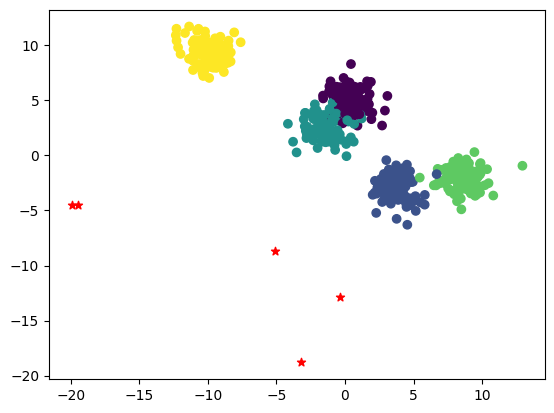

In [110]:
plt.scatter(x[:,0],x[:,1],c=y)
for i in clusters:
    center=clusters[i]['center']
    plt.scatter(center[0],center[1],marker="*",c="red")
plt.show()

In [111]:
def distance_(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))


In [112]:
k=5
def assing_cluster():
    for idx in range(x.shape[0]):
        distance=[]
        curr_x=x[idx]
        for i in range(k):

            center=clusters[i]['center']
            dis=distance_(curr_x,center)
            distance.append(dis)
        curr_cluster=np.argmin(distance)
        clusters[curr_cluster]['points'].append(curr_x)

In [113]:
assing_cluster()

In [114]:
clusters

{0: {'center': array([ -0.36131032, -12.84895406]),
  'points': [array([ 3.33144683, -4.12022901]),
   array([ 9.26586857, -1.9982627 ]),
   array([ 7.92048305, -1.59147012]),
   array([ 9.91599786, -1.53921245]),
   array([ 8.86261784, -0.36207725]),
   array([ 7.31370502, -2.5437812 ]),
   array([ 6.48238859, -2.71240075]),
   array([ 5.51685893, -4.27356365]),
   array([ 8.72781649, -1.86814599]),
   array([ 4.16148644, -3.00102336]),
   array([ 8.70215252, -2.38152201]),
   array([ 7.69872179, -1.0249319 ]),
   array([ 7.76810811, -1.72199767]),
   array([ 4.22914904, -3.95568226]),
   array([ 8.19408205, -0.84035185]),
   array([ 8.40262847, -2.66696625]),
   array([ 9.02517872, -1.06812965]),
   array([ 8.39905303, -1.20307566]),
   array([ 9.49484777, -3.66757739]),
   array([ 8.24966062, -1.89653633]),
   array([ 5.16967  , -3.7760595]),
   array([ 7.40892006, -1.95723554]),
   array([ 9.30473852, -1.46393608]),
   array([ 8.26375524, -0.2324954 ]),
   array([ 7.94287677, -1.63

In [115]:
def plot_cluster():
    for i in clusters:
        pts=np.array(clusters[i]['points'])
        try:
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        center=clusters[i]['center']
        plt.scatter(center[0],center[1],c="black",marker="^")
        
    plt.show()

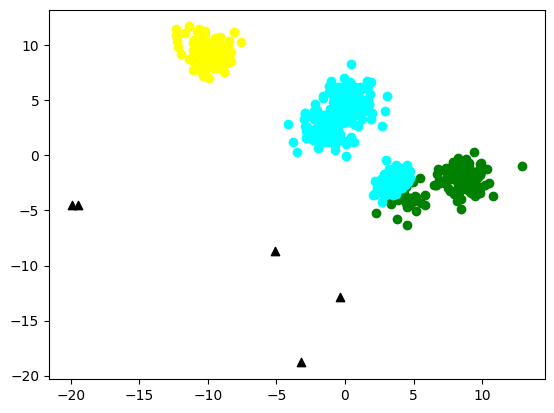

In [116]:
plot_cluster()

In [123]:
def update_cluster():
    for i in range(k):
        pts=np.array(clusters[i]['points'])
        if pts.shape[0]>0:
            new=pts.mean(axis=0)
        clusters[i]['center']=new
        clusters[i]['points']=[]

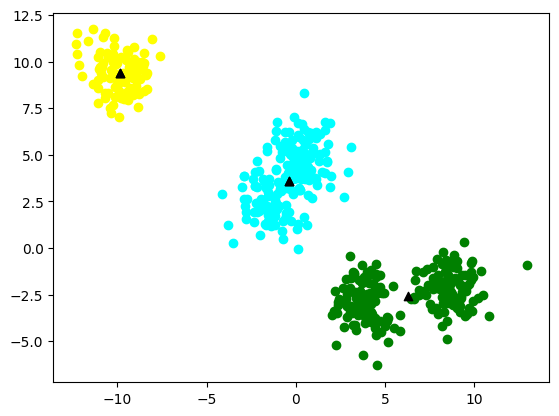

In [130]:
assing_cluster()
plot_cluster()
update_cluster()

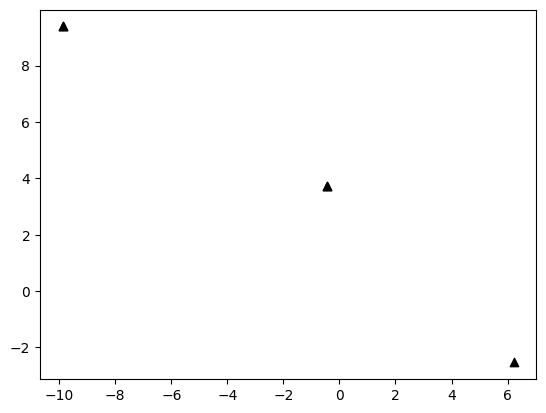

In [133]:
plot_cluster()

C:\Users\preeti\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


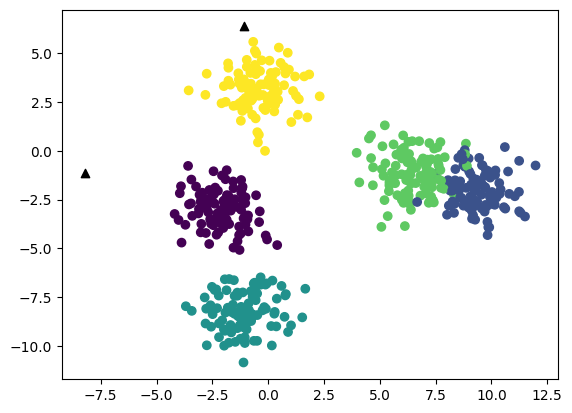

In [139]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
x,y=make_blobs(n_features=2,n_samples=500,centers=5)
km.fit(x,y)
center=km.cluster_centers_
plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter(center[0],center[1],marker="^",c="black")